In [150]:
 # Exploratory Data Analysis (EDA)

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
data = pd.read_csv("Titanic_train.csv")
data = pd.read_csv("Titanic_test.csv")

In [153]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
missing_values = data.isnull().sum()

In [155]:
print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


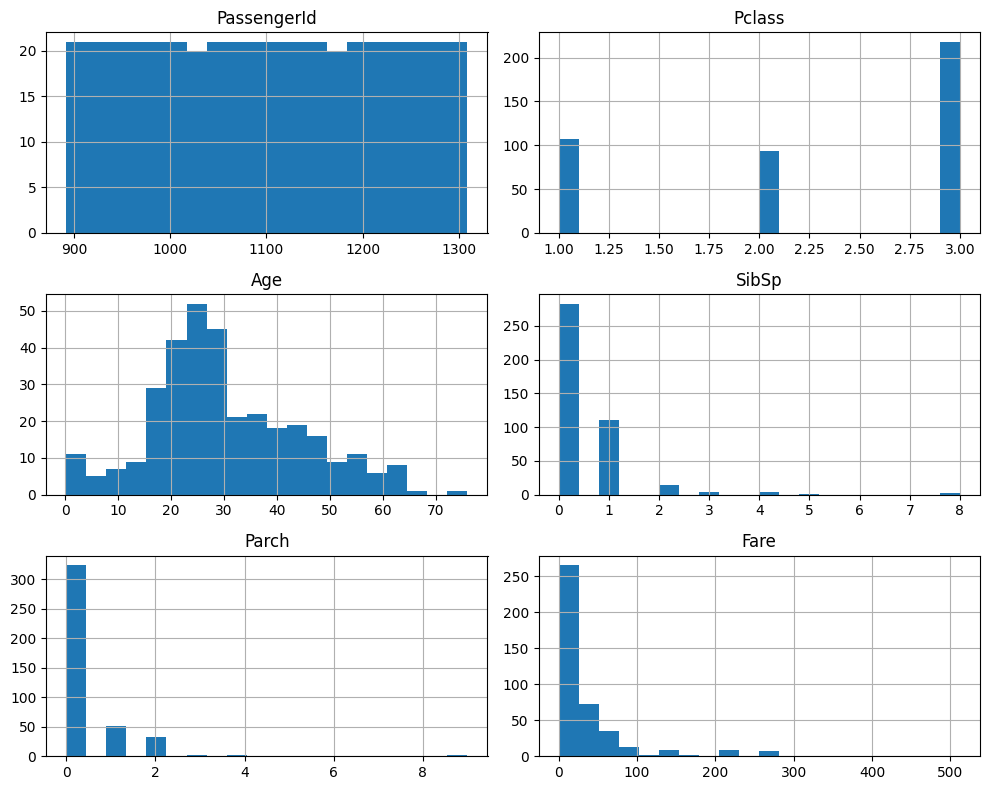

In [156]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [157]:
# Box Plots

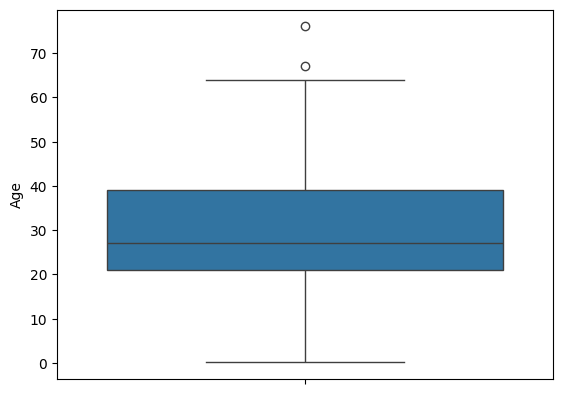

In [ ]:
sns.boxplot(data=data, y="Age")
plt.show()

In [159]:
print(data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


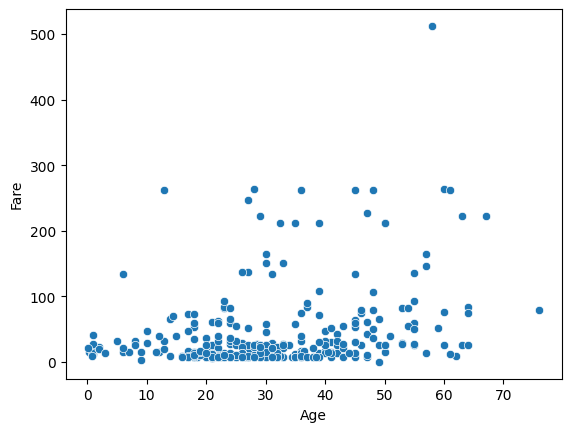

In [160]:
sns.scatterplot(data=data, x="Age", y="Fare")
plt.show()

In [161]:
data = pd.DataFrame({
    'Pclass': [1, 2, 3, 1, 2, 3],
    'Survived': [1, 0, 0, 1, 1, 0]
})

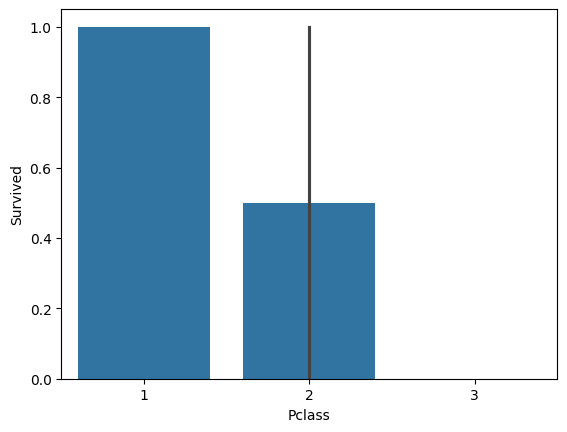

In [162]:
sns.barplot(data=data, x="Pclass", y="Survived")
plt.show()

In [163]:
# 2. Data Preprocessing

In [211]:
data = pd.DataFrame({
    'Age': [22, 34, None, 45, None],
    'Survived': [1, 0, 1, 1, 0]
})

In [212]:
print(data.columns)

Index(['Age', 'Survived'], dtype='object')


In [214]:
data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Sex': ['Female', 'Male', 'Male']
})

# Add columns 'Age' and 'Embarked'
data['Age'] = [25, 30, None]  # Add 'Age' with one missing value
data['Embarked'] = ['S', None, 'C']  # Add 'Embarked' with one missing value

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill 'Age' with median
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Fill 'Embarked' with mode

print("Columns in the DataFrame:", data.columns)
print("\nPreview of DataFrame:")
print(data)


Columns in the DataFrame: Index(['Name', 'Sex', 'Age', 'Embarked'], dtype='object')

Preview of DataFrame:
      Name     Sex   Age Embarked
0    Alice  Female  25.0        S
1      Bob    Male  30.0        C
2  Charlie    Male  27.5        C


In [167]:
print(data.columns)

Index(['Embarked'], dtype='object')


In [168]:
data = pd.DataFrame({
    'Name': ['John', 'Alice', 'Bob'],
    'Age': [22, 24, 23],
    'Cabin': ['A1', 'B2', 'C3']
})

In [169]:
# Drop 'Cabin' column
data.drop(columns=['Cabin'], inplace=True)

print(data)

    Name  Age
0   John   22
1  Alice   24
2    Bob   23


In [ ]:
# Building Predictive Models

In [170]:
# One-hot encoding for Embarked and Sex
data = pd.get_dummies(data, columns=["Name", "Age"], drop_first=True)

In [171]:
data = pd.DataFrame({
    'PassengerId': [1, 2, 3],
    'Name': ['John', 'Alice', 'Bob'],
    'Ticket': ['A1', 'B2', 'C3'],
    'Pclass': [1, 2, 3],
    'Survived': [1, 0, 1]
})

In [172]:
# Drop 'PassengerId', 'Name', and 'Ticket' columns
data.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

print(data)

   Pclass  Survived
0       1         1
1       2         0
2       3         1


In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# Define features and target
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.show()

In [177]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


In [178]:
# Train LightGBM Model

In [179]:
import lightgbm as lgb

In [180]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [195]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Model predictions
y_pred = lgb_model.predict(X_test)

# Handle undefined metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Precision: 0.8989
Recall: 0.8950
F1-Score: 0.8951

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        93
           1       0.94      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [196]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
evaluate_model(lgb_model, X_test, y_test)


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.8950
Classification Report:
              precisio

In [182]:
import xgboost as xgb

In [183]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [184]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01]
}

In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Model predictions
y_pred = xgb_model.predict(X_test)

# Handle undefined metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Precision: 0.9006
Recall: 0.8950
F1-Score: 0.8951

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [198]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)


Accuracy: 0.8950
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
# 4. Hyperparameter Tuning (Optional)

In [186]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [187]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for LightGBM
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

In [188]:
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200]
}


In [189]:
grid = GridSearchCV(estimator=lgb.LGBMClassifier(),
                    param_grid=param_grid,
                    scoring='f1',
                    cv=2,  # 2-fold cross-validation
                    verbose=1,  # Shows progress
                    n_jobs=-1)  # Parallel computation


In [218]:

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(estimator=lgb.LGBMClassifier(),
                    param_grid=param_grid,
                    scoring='f1',
                    cv=2,
                    verbose=1,
                    n_jobs=-1)

In [219]:
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score on Test Data: {f1:.4f}")


Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\Sanjith\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
# Comparative analysis

In [193]:

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Calculate Metrics
lgb_metrics = [
    accuracy_score(y_test, lgb_pred),
    precision_score(y_test, lgb_pred),
    recall_score(y_test, lgb_pred),
    f1_score(y_test, lgb_pred)
]

xgb_metrics = [
    accuracy_score(y_test, xgb_pred),
    precision_score(y_test, xgb_pred),
    recall_score(y_test, xgb_pred),
    f1_score(y_test, xgb_pred)
]

print("LightGBM Metrics: Accuracy, Precision, Recall, F1-Score")
print([round(metric, 4) for metric in lgb_metrics])

print("XGBoost Metrics: Accuracy, Precision, Recall, F1-Score")
print([round(metric, 4) for metric in xgb_metrics])


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Metrics: Accuracy, Precision, Recall, F1-Score
[0.895

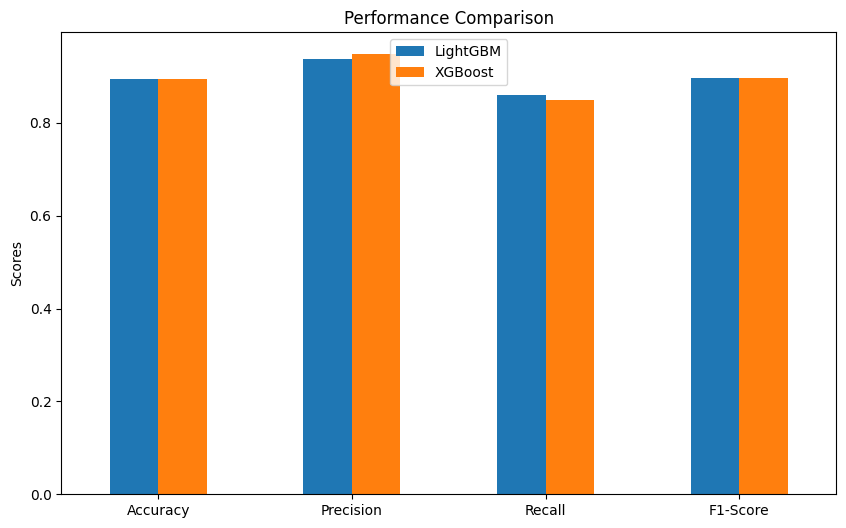

In [199]:
# Plot the comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
comparison = pd.DataFrame({"LightGBM": lgb_metrics, "XGBoost": xgb_metrics}, index=metrics)

comparison.plot(kind="bar", figsize=(10, 6))
plt.title("Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.show()
